# 第5章 教師あり学習: 回帰

## 5.1 1次元入力の直線モデル

### 5.1.1 問題設定

In [ ]:
# リスト 5-1-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 ----------
np.random.seed(seed=1)          # 乱数を固定する
X_min, X_max = 4, 30            # X の下限と上限（表示用）
N = 16                          # データの個数
X = 5 + 25 * np.random.rand(N)  # X の生成
prm = [170, 108, 0.2]           # データ生成のパラメータ
T = prm[0] - prm[1] * np.exp(-prm[2] * X) \
    + 4 * np.random.randn(N)    # (A) 目標データの生成
np.savez(                       # (B) データの保存
    "ch5_data.npz",
    X=X, T=T, X_min=X_min, X_max=X_max, N=N,
)

In [3]:
# リスト 5-1-(2)
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
# リスト 5-1-(3)
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [9]:
# リスト 5-1-(4)
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


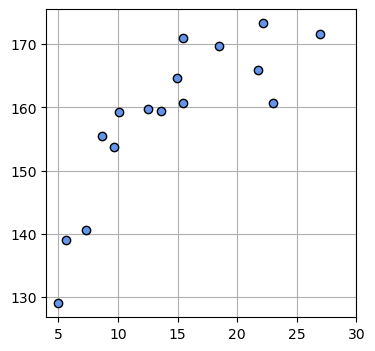

In [5]:
# リスト 5-1-(5)
# データ表示 ----------
plt.figure(figsize=(4, 4))
plt.plot(
    X,                        # 入力データ
    T,                        # 目標データ
    "cornflowerblue",         # マーカーを水色にする
    marker="o",               # マーカーの形をoにする
    linestyle="None",         # マーカーを線で結ばない
    markeredgecolor="black",  # マーカーの輪郭を黒にする
)
plt.xlim(X_min, X_max)        # x軸の範囲を指定
plt.grid()                    # グリッドを表示する
plt.show()

### 5.1.2 直線モデル

In [10]:
hito = np.zeros((10))
print(hito)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 5.1.3 平均二乗誤差

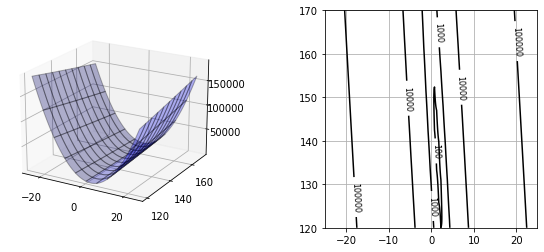

In [11]:
# リスト 5-1-(6)
# 平均二乗誤差(MSE)関数 ----------
def mse_line(x, t, w):
    y = w[0] * x + w[1]          # 式5-4、yを求める
    mse = np.mean((y - t) ** 2)  # 式5-3、平均二乗誤差
    return mse

# 各w0、w1で平均二乗誤差(MSE)を計算 ----------
w0_n, w1_n = 100, 100                   # グラフ表示の解像度
w0_min, w0_max = -25, 25                # w0の計算範囲
w1_min, w1_max = 120, 170               # w1の計算範囲
w0 = np.linspace(w0_min, w0_max, w0_n)  # w0を準備
w1 = np.linspace(w1_min, w1_max, w1_n)  # w1を準備
J = np.zeros((w1_n, w0_n))              # MSEを入れる配列Jを準備
# グリッド状の点(w0, w1)に対してJを計算
for i0 in range(w0_n):
    for i1 in range(w1_n):
        w = np.array([w0[i0], w1[i1]])
        J[i1, i0] = mse_line(X, T, w)
ww0, ww1 = np.meshgrid(w0, w1)          # グリッド座標の作成

# グラフ描画 ----------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
# サーフェス表示
ax = plt.subplot(1, 2, 1, projection="3d")
ax.plot_surface(
    ww0, ww1, J,
    rstride=10, cstride=10, alpha=0.3, color="blue", edgecolor="black",
)
ax.set_xticks([-20, 0, 20])     # x軸の目盛り指定
ax.set_yticks([120, 140, 160])  # y軸の目盛り指定
ax.view_init(20, -60)           # グラフの向きの指定
# 等高線表示
plt.subplot(1, 2, 2)
cont = plt.contour(
    ww0, ww1, J, colors="black",
    levels=[100, 1000, 10000, 100000],  # 描く等高線の値を指定
)
cont.clabel(fmt="%d", fontsize=8)
plt.grid()
plt.show()

### 5.1.4 パラメータを求める（勾配法）

In [12]:
# リスト 5-1-(7)
# 平均二乗誤差(MSE)の勾配 ----------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)  # 式5-9
    d_w1 = 2 * np.mean(y - t)        # 式5-10
    return d_w0, d_w1

In [13]:
# リスト 5-1-(8)
w = np.array([10, 165])
d_w = dmse_line(X, T, w)
print(np.round(d_w, 2))

[5046.29  301.8 ]


繰り返し回数 13820
w0 = 1.539947, w1 = 136.176160
dMSE = [-0.005794, 0.099991]
MSE = 49.027452
SD = 7.001961 cm


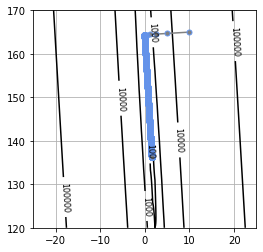

In [14]:
# リスト 5-1-(9)
# 勾配法 ----------
def fit_line_num(x, t, w_init):
    # パラメータ
    alpha = 0.001     # 学習率
    tau_max = 100000  # 繰り返しの最大数
    eps = 0.1         # 繰り返し計算を終了するための閾値
    # 勾配法
    w = np.zeros((tau_max + 1, 2))  # 変化するwの履歴を入れる配列
    w[0, :] = w_init                # wの初期値をセット
    for tau in range(tau_max):
        dmse = dmse_line(x, t, w[tau, :])
        w[tau + 1, 0] = w[tau, 0] - alpha * dmse[0]  # 式5-6
        w[tau + 1, 1] = w[tau, 1] - alpha * dmse[1]  # 式5-7
        if max(np.absolute(dmse)) < eps:  # 終了判定
            break  # tau のループから抜ける
    w_final = w[tau + 1, :]   # 最終的に得られたw
    w_hist = w[: tau + 2, :]  # wの履歴で更新した分を抜き出す
    return w_final, dmse, w_hist

# メイン ----------
# 勾配法でwを計算
w_init = np.array([10.0, 165.0])               # wの初期値
w, dmse, w_history = fit_line_num(X, T, w_init)  # wを計算
mse = mse_line(X, T, w)                        # MSEを計算
# 結果表示
print(f"繰り返し回数 {w_history.shape[0]-1}")
print(f"w0 = {w[0]:.6f}, w1 = {w[1]:.6f}")
print(f"dMSE = [{dmse[0]:.6f}, {dmse[1]:.6f}]")
print(f"MSE = {mse:.6f}")
print(f"SD = {np.sqrt(mse):.6f} cm")

# グラフ描画 ----------
plt.figure(ﬁgsize=(4, 4))
# 等高線表示
cont = plt.contour(
    ww0, ww1, J,     # リスト5-1-(6)で作成済
    colors="black", levels=[100, 1000, 10000, 100000],
)
cont.clabel(fmt="%1.0f", fontsize=8)
# 等高線の上に、過去のすべてのwをプロット
plt.plot(  
    w_history[:, 0], w_history[:, 1], "gray",
    marker=".",                        # マーカーの形
    markersize=10,                     # マーカーの大きさ
    markeredgecolor="cornflowerblue",  # マーカーの輪郭の色
)
plt.grid()
plt.show()

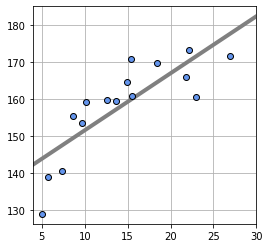

In [15]:
# リスト 5-1-(10)
# 線の表示 ----------
def show_line(w):
    x = np.linspace(X_min, X_max, 100)
    y = w[0] * x + w[1]
    plt.plot(x, y, "gray", linewidth=4)

# メイン ----------
# グラフ描画
plt.figure(figsize=(4, 4))
show_line(w)  # w はリスト5-1-(9)で計算済
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

### 5.1.5 直線モデルパラメータの解析解

w0 = 1.56, w1 = 135.87
MSE = 49.01
SD = 7.00 cm


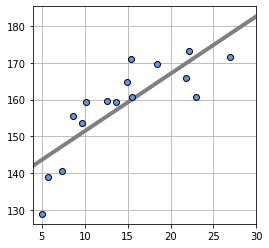

In [16]:
# リスト 5-1-(11)
# 解析解 ----------
def fit_line(x, t):
    mx = np.mean(x)        # <x>
    mt = np.mean(t)        # <t>
    mtx = np.mean(t * x)   # <tx>
    mxx = np.mean(x * x)   # <x^2>
    w0 = (mtx - mt * mx) / (mxx - mx ** 2)  # 式5-20
    w1 = mt - w0 * mx                       # 式5-21
    w = np.array([w0, w1])
    return w

# メイン ----------
w = fit_line(X, T)       # 解析解でwを計算
mse = mse_line(X, T, w)  # MSEを計算
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}")
print(f"MSE = {mse:.2f}")
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
show_line(w)
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.2 2次元入力の面モデル

### 5.2.1 問題設定

In [17]:
%reset

In [18]:
# リスト 5-2-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データのロード ----------
data = np.load("ch5_data.npz")
X0 = data["X"]  # これまでのXをX0とする
N = data["N"]
T = data["T"]

# 2次元データ生成 ----------
np.random.seed(seed=1)  # 乱数を固定
X1 = 23 * (T / 100) ** 2 + 2 * np.random.randn(N)  # X1を生成
X0_min, X0_max = 5, 30   # X0の下限と上限（表示用）
X1_min, X1_max = 40, 75  # X1の下限と上限（表示用）

In [19]:
# リスト 5-2-(2)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


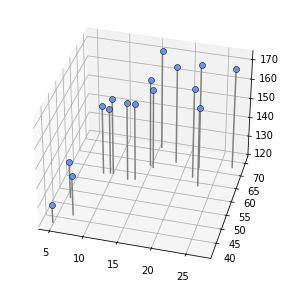

In [20]:
# リスト 5-2-(3)
# 2次元データの表示 ----------
def show_data2d(ax, x0, x1, t):  # axは3dグラフ描画のため
    for i in range(len(x0)):
        ax.plot(  # データ点の下の直線の描画
            [x0[i], x0[i]],       # 直線の両端のx座標
            [x1[i], x1[i]],       # 直線の両端のy座標
            [120, t[i]],          # 直線の両端のz座標
            color="gray",
        )
    ax.plot(      # データ点の描画
        x0,                       # x座標
        x1,                       # y座標
        t,                        # z座標
        "cornflowerblue",         # 色
        marker="o",               # マーカーの形状
        linestyle="None",         # 点をつなげる線は描かない
        markeredgecolor="black",  # マーカーの輪郭の色
        markersize=6,             # マーカーのサイズ
        markeredgewidth=0.5,      # マーカーの輪郭線の太さ
    )
    ax.view_init(elev=35, azim=-75)  # グラフの向きの指定

# メイン ----------
plt.figure(figsize=(6, 5))
ax = plt.subplot(projection="3d")
show_data2d(ax, X0, X1, T)
plt.show()

### 5.2.2 データの表し方

### 5.2.3 面モデル

SD = 12.88 cm


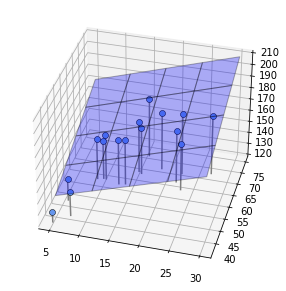

In [21]:
# リスト 5-2-(4)
# 面の表示 ----------
def show_plane(ax, w):
    # 表示データの計算
    x0_n, x1_n = 5, 5
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)  # グリッド座標の作成
    y = w[0] * xx0 + w[1] * xx1 + w[2]  # (A) 式5-28
    # サーフェス表示
    ax.plot_surface(
        xx0, xx1, y,
        rstride=1, cstride=1, alpha=0.3, color="blue", edgecolor="black",
    )

# 面の平均二乗誤差(MSE)関数 ----------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]  # (A) 式5-28
    mse = np.mean((y - t) ** 2)
    return mse

# メイン ----------
w = np.array([1.5, 1, 90])
mse = mse_plane(X0, X1, T, w)  # MSEを計算
# 結果表示
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 ----------
plt.figure(figsize=(6, 5))
ax = plt.subplot(projection="3d")
show_plane(ax, w)
show_data2d(ax, X0, X1, T)
plt.show()

### 5.2.4 面モデルパラメータの解析解

w0 = 0.46, w1 = 1.09, w2 = 89.05
SD = 2.55 cm


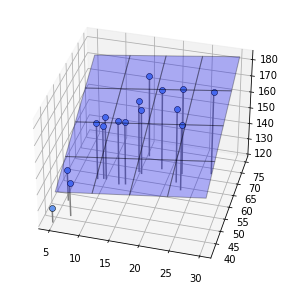

In [22]:
# リスト 5-2-(5)
# 解析解 ----------
def fit_plane(x0, x1, t):  
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)     # cov(t, x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)     # cov(t, x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)  # cov(x0, x1)
    v_x0 = np.var(x0)                                      # var(x0)
    v_x1 = np.var(x1)                                      # var(x1)
    # 式5-34
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1 ** 2 - v_x0 * v_x1)
    # 式5-35
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1 ** 2 - v_x0 * v_x1)
    # 式5-36
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    w = np.array([w0, w1, w2])
    return w

# メイン ----------
w = fit_plane(X0, X1, T)       # wを計算
mse = mse_plane(X0, X1, T, w)  # MSEを計算
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 ----------
plt.figure(figsize=(6, 5))
ax = plt.subplot(projection="3d")
show_plane(ax, w)
show_data2d(ax, X0, X1, T)
plt.show()

## 5.3 D次元線形回帰モデル

### 5.3.1 D次元線形回帰モデル

### 5.3.2 パラメータの解析解

### 5.3.3 原点を通らない面への拡張

## 5.4 線形基底関数モデル

In [23]:
%reset

In [24]:
# リスト 5-3-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データのロード ----------
data = np.load("ch5_data.npz")
X = data["X"]
X_min = 0
X_max = data["X_max"]
N = data["N"]
T = data["T"]

In [25]:
# リスト 5-3-(2)
# ガウス関数 ----------
def gauss(x, mu, s):
    y = np.exp(-((x - mu) ** 2) / (2 * s ** 2))  # 式5-64
    return y

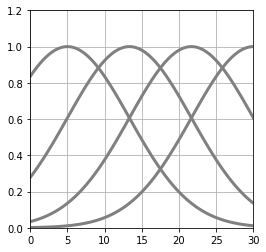

In [26]:
# リスト 5-3-(3)
# メイン ----------
M = 4                                # ガウス関数の数
mu = np.linspace(5, 30, M)           # 平均パラメータ
s = mu[1] - mu[0]                    # (A) 標準偏差パラメータ
xb = np.linspace(X_min, X_max, 100)
y = np.zeros((M, 100))  # M個のガウス関数の値を入れるyを準備
for j in range(M):
    y[j, :] = gauss(xb, mu[j], s)    # ガウス関数

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
for j in range(M):
    plt.plot(xb, y[j, :], "gray", linewidth=3)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.grid()
plt.show()

In [27]:
# リスト 5-3-(4)
# 線形基底関数モデル ----------
def gauss_func(w, x):
    m = len(w) - 1        # ガウス関数の数
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    # xと同じサイズで要素が0のndarray型を作成
    y = np.zeros_like(x)
    # ここでは式5-66ではなく式5-65で実装
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]  # phiを掛けないパラメータを最後に加える
    return y

In [28]:
# リスト 5-3-(5)
# 線形基底関数モデルの平均二乗誤差(MSE) ----------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t) ** 2)
    return mse

In [29]:
# リスト 5-3-(6)
# 線形基底関数モデルの厳密解 ----------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    # 式5-69 の計画行列phiを作成
    phi = np.ones((n, m + 1))  # (A) 要素が1のn x (m+1)行列
    for j in range(m):         # (B) 0～m-1列に値を割り振る
        phi[:, j] = gauss(x, mu[j], s)
    # 式5-68 で厳密解のwを計算
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ t
    return w

w =  [29.39 75.66  2.86 98.28 54.88]
SD = 3.98 cm


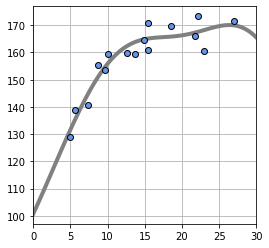

In [30]:
# リスト 5-3-(7)
# ガウス基底関数表示 ----------
def show_gauss_func(w):
    x = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, x)
    plt.plot(x, y, "gray", linewidth=4)

# メイン ----------
M = 4                          # ガウス関数の数
w = fit_gauss_func(X, T, M)    # wを計算
mse = mse_gauss_func(X, T, w)  # MSEを計算
# 結果表示
print("w = ", np.round(w, 2))
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
show_gauss_func(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.5 オーバーフィッティングの問題

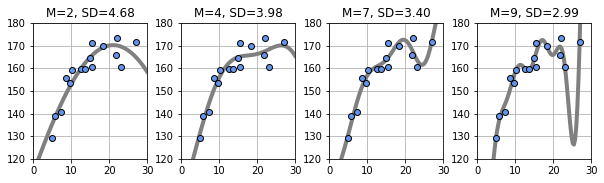

In [31]:
# リスト 5-3-(8)
M = [2, 4, 7, 9]                    # 調べるMの値
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    w = fit_gauss_func(X, T, M[i])  # wを計算
    mse = mse_gauss_func(X, T, w)   # MSEを計算
    # グラフ描画
    show_gauss_func(w)  # 線形基底関数
    plt.plot(           # データ点
        X, T, "cornflowerblue",
        marker="o", linestyle="None", markeredgecolor="black",
    )
    plt.title(f"M={M[i]:d}, SD={np.sqrt(mse):.2f}")
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid()

plt.show()

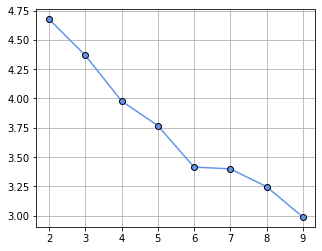

In [32]:
# リスト 5-3-(9)
# メイン ----------
M = range(2, 10)
sd = np.zeros(len(M))
for i in range(len(M)):
    w = fit_gauss_func(X, T, M[i])            # wを計算
    sd[i] = np.sqrt(mse_gauss_func(X, T, w))  # SDを計算

# グラフ描画 ----------
plt.figure(figsize=(5, 4))
plt.plot(M, sd, "cornflowerblue", marker="o", markeredgecolor="black")
plt.grid()
plt.show()

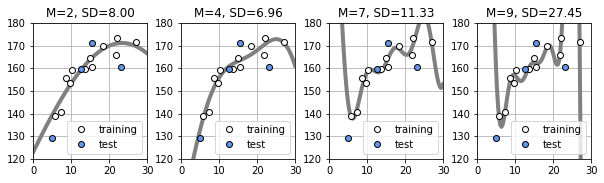

In [33]:
# リスト 5-3-(10)
# 訓練データとテストデータに分割----------
split = int(N / 4)  # 分割するインデックス
X_test = X[:split]
T_test = T[:split]
X_train = X[split:]
T_train = T[split:]

# メイン ----------
M = [2, 4, 7, 9]  # 調べるMの値
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    w = fit_gauss_func(X_train, T_train, M[i])       # wを計算
    sd = np.sqrt(mse_gauss_func(X_test, T_test, w))  # SDを計算
    # グラフ描画
    plt.subplot(1, len(M), i + 1)
    show_gauss_func(w)  # 線形基底関数
    plt.plot(           # 訓練データ
        X_train, T_train, "white",
        marker="o", linestyle="None", markeredgecolor="black", 
        label="training",
    )
    plt.plot(           # テストデータ
        X_test, T_test, "cornflowerblue",
        marker="o", linestyle="None", markeredgecolor="black",
        label="test",
    )
    plt.title(f"M={M[i]:d}, SD={sd:.2f}")
    plt.legend(loc="lower right", fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid()
plt.show()

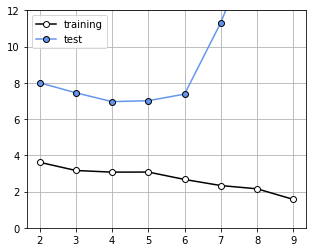

In [34]:
# リスト 5-3-(11)
# メイン ----------
M = range(2, 10)  # 調べるMの値、2から9
sd_train = np.zeros(len(M))
sd_test = np.zeros(len(M))
for i in range(len(M)):
    # wを計算
    w = fit_gauss_func(X_train, T_train, M[i])
    # 訓練データのSDを計算
    sd_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, w))
    # テストデータのSDを計算
    sd_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, w))

# グラフ描画 ----------
plt.figure(figsize=(5, 4))
plt.plot(  # 訓練データのSD
    M, sd_train, "black",
    marker="o", linestyle="-", 
    markerfacecolor="white", markeredgecolor="black",
    label="training",
)
plt.plot(  # テストデータのSD
    M, sd_test, "cornflowerblue",
    marker="o", linestyle="-",
    markeredgecolor="black",
    label="test",
)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 12)
plt.grid()
plt.show()

In [35]:
# リスト 5-3-(12)
# K 分割交差検証 ----------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # 訓練データとテストデータに分割
        # (A) テストデータのインデックス
        i_test = np.fmod(range(n), k)
        x_test = x[i_test == i]   # テストデータ x 
        t_test = t[i_test == i]   # テストデータ t
        x_train = x[i_test != i]  # 訓練データ x
        t_train = t[i_test != i]  # 訓練データ t
        # wを訓練データで決める
        w = fit_gauss_func(x_train, t_train, m)
        # 訓練データのMSEを計算
        mse_train[i] = mse_gauss_func(x_train, t_train, w)
        # テストデータのMSEを計算
        mse_test[i] = mse_gauss_func(x_test, t_test, w)
    return mse_train, mse_test

In [36]:
# リスト 5-3-(13)
np.fmod(range(10), 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [37]:
# リスト 5-3-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

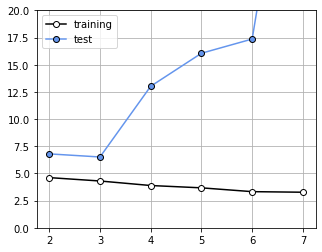

In [38]:
# リスト 5-3-(15)
# メイン ----------
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] \
        = kfold_gauss_func(X, T, M[i], K)  # k分割交差検定
# 訓練データの各分割におけるMSEの平均、の平方根
sd_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
# テストデータの各分割におけるMSEの平均、の平方根
sd_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))
np.save("ch5_Gauss_test.npy", sd_Gauss_test)  # 結果の保存

# グラフ描画 ----------
plt.figure(figsize=(5, 4))
# 訓練データに対するMSEのグラフ
plt.plot(
    M, sd_Gauss_train, "black",
    marker="o", linestyle="-", 
    markerfacecolor="white", markeredgecolor="black",
    label="training",
)
# テストデータに対するMSEのグラフ
plt.plot(
    M, sd_Gauss_test, "cornflowerblue",
    marker="o", linestyle="-",
    markeredgecolor="black",
    label="test",
)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 20)
plt.grid()
plt.show()

SD = 4.37 cm


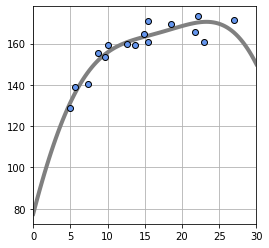

In [39]:
# リスト 5-3-(16)
# メイン ----------
M = 3  # 最適なM=3に設定
w = fit_gauss_func(X, T, M)  # 全データでwを計算
sd = np.sqrt(mse_gauss_func(X, T, w))  # SDを計算
# 結果表示
print(f"SD = {sd:.2f} cm")

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
show_gauss_func(w)
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.6 新しいモデルの生成

In [40]:
%reset

In [41]:
# リスト 5-4-(1)
import numpy as np
import matplotlib.pyplot as plt

# データのロード ----------
data = np.load("ch5_data.npz")
X = data["X"]
X_min = 0
X_max = data["X_max"]
N = data["N"]
T = data["T"]

# モデル A ----------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)  # 式5-71
    return y

# モデル A 表示 ----------
def show_model_A(w):
    x = np.linspace(X_min, X_max, 100)
    y = model_A(x, w)
    plt.plot(x, y, "gray", linewidth=4)

# モデル A の平均二乗誤差(MSE) ----------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t) ** 2)  # 式5-72
    return mse

In [42]:
# リスト 5-4-(2)
from scipy.optimize import minimize

# モデル A のパラメータ最適化
def fit_model_A(w_init, x, t):
    res = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res.x

w0 = 169.04, w1 = 113.66, w2 = 0.22
SD = 3.86 cm


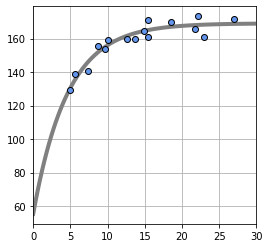

In [43]:
# リスト 5-4-(3)
# メイン ----------
w_init = np.array([100.0, 0.0, 0.0])  # wの初期値
w = fit_model_A(w_init, X, T)         # wを計算
sd = np.sqrt(mse_model_A(w, X, T))    # SDを計算
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(f"SD = {sd:.2f} cm")

# グラフ描画 ----------
plt.figure(figsize=(4, 4))
show_model_A(w)
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.7 モデルの選択

Gauss(M=3) SD = 6.51 cm
Model A SD = 4.70 cm


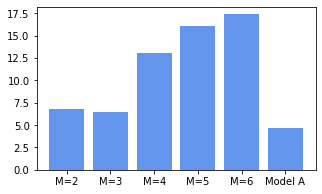

In [44]:
# リスト 5-4-(4)
# 交差検証 モデル A ----------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # 訓練データとテストデータに分割
        i_test = np.fmod(range(n), k)
        x_test = x[i_test == i]
        t_test = t[i_test == i]
        x_train = x[i_test != i]
        t_train = t[i_test != i]
        # 精度を上げるため
        # リスト5-4-(3)で得た値を初期値に設定
        w_init = np.array([169.04, 113.66, 0.22])
        w = fit_model_A(w_init, x_train, t_train)
        mse_train[i] = mse_model_A(w, x_train, t_train)
        mse_test[i] = mse_model_A(w, x_test, t_test)
    return mse_train, mse_test

# メイン ----------
# model A の交差検定
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
sd_A_test = np.sqrt(np.mean(Cv_A_test))
# 線形基底関数モデルの交差検定の結果のロード
sd_Gauss_test = np.load("ch5_Gauss_test.npy")
# 結果のまとめ
SDs = np.append(sd_Gauss_test[0:5], sd_A_test)
# 結果表示
print(f"Gauss(M=3) SD = {sd_Gauss_test[1]:.2f} cm")
print(f"Model A SD = {sd_A_test:.2f} cm")

# グラフ描画 ----------
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(
    M, SDs,facecolor="cornflowerblue", align="center", 
    tick_label=label,
)
plt.show()

## 5.8 まとめ